In [5]:
pip install numpy

In [6]:
pip install pandas

In [7]:
pip install matplotlib

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('/content/Hospital Data9.xlsx')

In [4]:
display(df.head())

,months,Beds_Available,No of Inpatients,Inpatient Days,No of Deaths,No of Deaths within 48 hrs
0,Jan'22,415.0,1320,7597,32,12
1,Feb'22,NaN,1276,7215,24,9
2,Mar'22,NaN,1415,7547,22,13
3,Apr'22,NaN,1241,7099,31,14
4,May'22,NaN,1378,7351,36,11


In [41]:
# Calculate the Bed Occupancy Rate (BOR)
df['Bed_Occupancy_Rate (%)'] = (
    df['Inpatient_Days'] / (df['Beds_Available'] * df['Days_in_Month'])
) * 100

# Extract and display only the required columns
bor_data = df[['Month', 'Bed_Occupancy_Rate (%)']]
print(bor_data)
# Calculate Average Length of Stay (ALOS)
df['Average_Length_of_Stay (ALOS)'] = df['Inpatient_Days'] / df['No_of_Inpatients']

# Extract and display the required columns
data = df[['Month', 'Average_Length_of_Stay (ALOS)']]
print(data)
# Calculate Gross Death Rate (GDR)
df['Gross_Death_Rate (%)'] = (df['No_of_Deaths'] / df['No_of_Inpatients']) * 100

# Extract and display the required columns
data = df[['Month', 'Gross_Death_Rate (%)']]
print(data)


    Month  Bed_Occupancy_Rate (%)
0  Jan'22               59.051691
8  Sep'22               47.698925
    Month  Average_Length_of_Stay (ALOS)
0  Jan'22                       5.755303
8  Sep'22                       4.357564
    Month  Gross_Death_Rate (%)
0  Jan'22              2.424242
8  Sep'22              1.326130


In [32]:
import pandas as pd

# Load the dataset
df = pd.read_excel('/content/Hospital Data9.xlsx')

# Inspect the column names to confirm structure
print(df.columns)

# Rename columns to match the dataset structure (adjust as necessary)
df.columns = [ 'Month', 'Beds_Available', 'No_of_Inpatients',
              'Inpatient_Days', 'No_of_Deaths', 'Deaths_within_48hrs']

# Define the number of days in each month
days_in_month = {
    "Jan'22": 31, "Feb'22": 28, "Mar'22": 31, "Apr'22": 30,
    "May'22": 31, "Jun'22": 30, "Jul'22": 31, "Aug'22": 31,
    "Sep'22": 30, "Oct'22": 31, "Nov'22": 30, "Dec'22": 31
}

# Map the number of days to the dataset
df['Days_in_Month'] = df['Month'].map(days_in_month)

# Remove rows with missing data in critical columns
df = df.dropna(subset=['Beds_Available', 'Inpatient_Days'])

# Calculate the Bed Occupancy Rate (BOR)
df['Bed_Occupancy_Rate (%)'] = (
    df['Inpatient_Days'] / (df['Beds_Available'] * df['Days_in_Month'])
) * 100

# Extract and display only the required columns
bor_data = df[['Month', 'Bed_Occupancy_Rate (%)']]
print(bor_data)


Index(['months', 'Beds_Available ', 'No of Inpatients ', 'Inpatient Days ',
       'No of Deaths ', 'No of Deaths within 48 hrs '],
      dtype='object')
    Month  Bed_Occupancy_Rate (%)
0  Jan'22               59.051691
8  Sep'22               47.698925


In [33]:
# Ensure no critical data is missing for calculation
df = df.dropna(subset=['No_of_Inpatients', 'Inpatient_Days'])

# Calculate Average Length of Stay (ALOS)
df['Average_Length_of_Stay (ALOS)'] = df['Inpatient_Days'] / df['No_of_Inpatients']

# Extract and display the required columns
data = df[['Month', 'Average_Length_of_Stay (ALOS)']]
print(data)

    Month  Average_Length_of_Stay (ALOS)
0  Jan'22                       5.755303
8  Sep'22                       4.357564


In [34]:
# Ensure no critical data is missing for calculation
df = df.dropna(subset=['No_of_Deaths', 'No_of_Inpatients'])

# Calculate Gross Death Rate (GDR)
df['Gross_Death_Rate (%)'] = (df['No_of_Deaths'] / df['No_of_Inpatients']) * 100

# Extract and display the required columns
data = df[['Month', 'Gross_Death_Rate (%)']]
print(data)

    Month  Gross_Death_Rate (%)
0  Jan'22              2.424242
8  Sep'22              1.326130


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

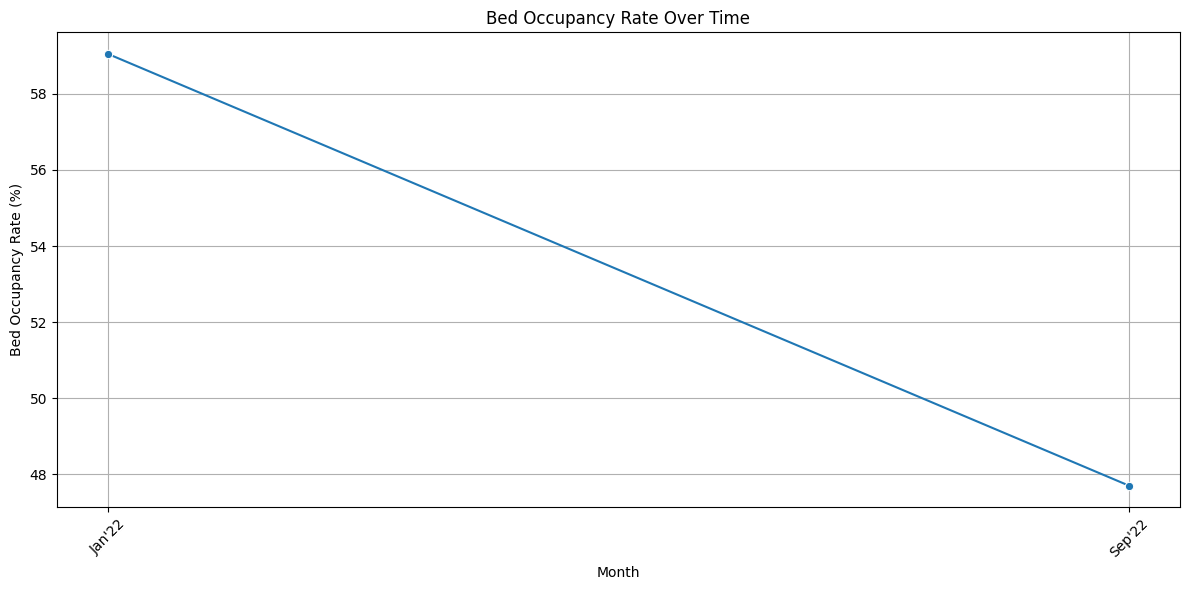

In [36]:
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.lineplot(x='Month', y='Bed_Occupancy_Rate (%)', data=bor_data, marker='o')
plt.title('Bed Occupancy Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Bed Occupancy Rate (%)')
plt.grid(True)  # Add gridlines for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

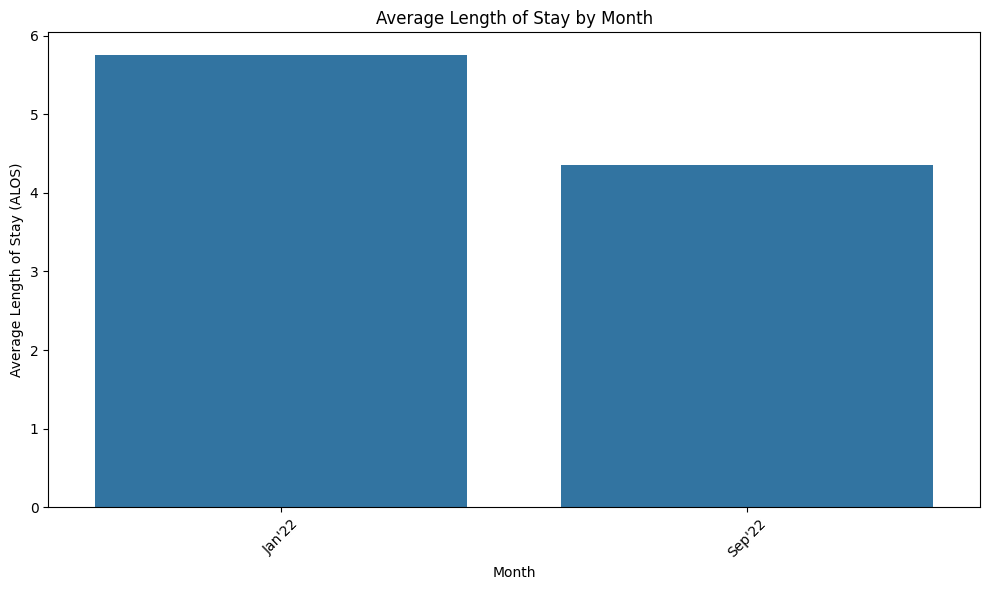

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Average_Length_of_Stay (ALOS)', data=df)
plt.title('Average Length of Stay by Month')
plt.xlabel('Month')
plt.ylabel('Average Length of Stay (ALOS)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

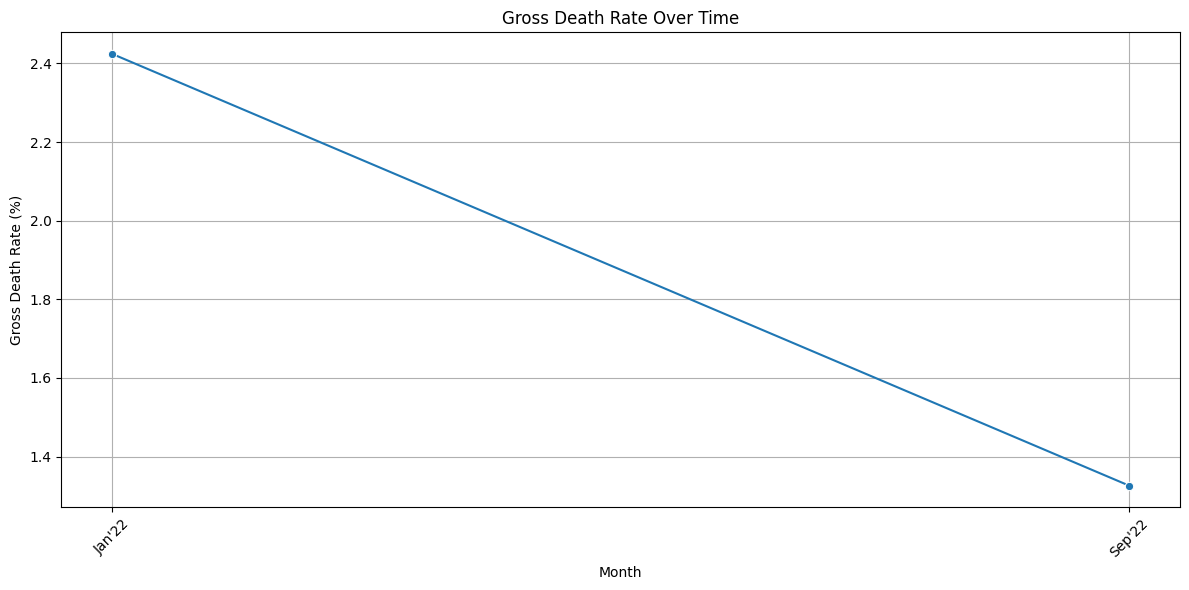

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Gross_Death_Rate (%)', data=df, marker='o')
plt.title('Gross Death Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Gross Death Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Descriptive Statistics of Key Metrics:
       Bed_Occupancy_Rate (%)  Average_Length_of_Stay (ALOS)  \
count                2.000000                       2.000000   
mean                53.375308                       5.056433   
std                  8.027618                       0.988351   
min                 47.698925                       4.357564   
25%                 50.537116                       4.706999   
50%                 53.375308                       5.056433   
75%                 56.213499                       5.405868   
max                 59.051691                       5.755303   

       Gross_Death_Rate (%)  
count              2.000000  
mean               1.875186  
std                0.776483  
min                1.326130  
25%                1.600658  
50%                1.875186  
75%                2.149714  
max                2.424242  

Correlation Matrix:
                               Bed_Occupancy_Rate (%)  \
Bed_Occupancy_Rate (%)              

<ipython-input-43-49430133cbba>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Bed_Occupancy_Rate (%)', data=df, palette='coolwarm')


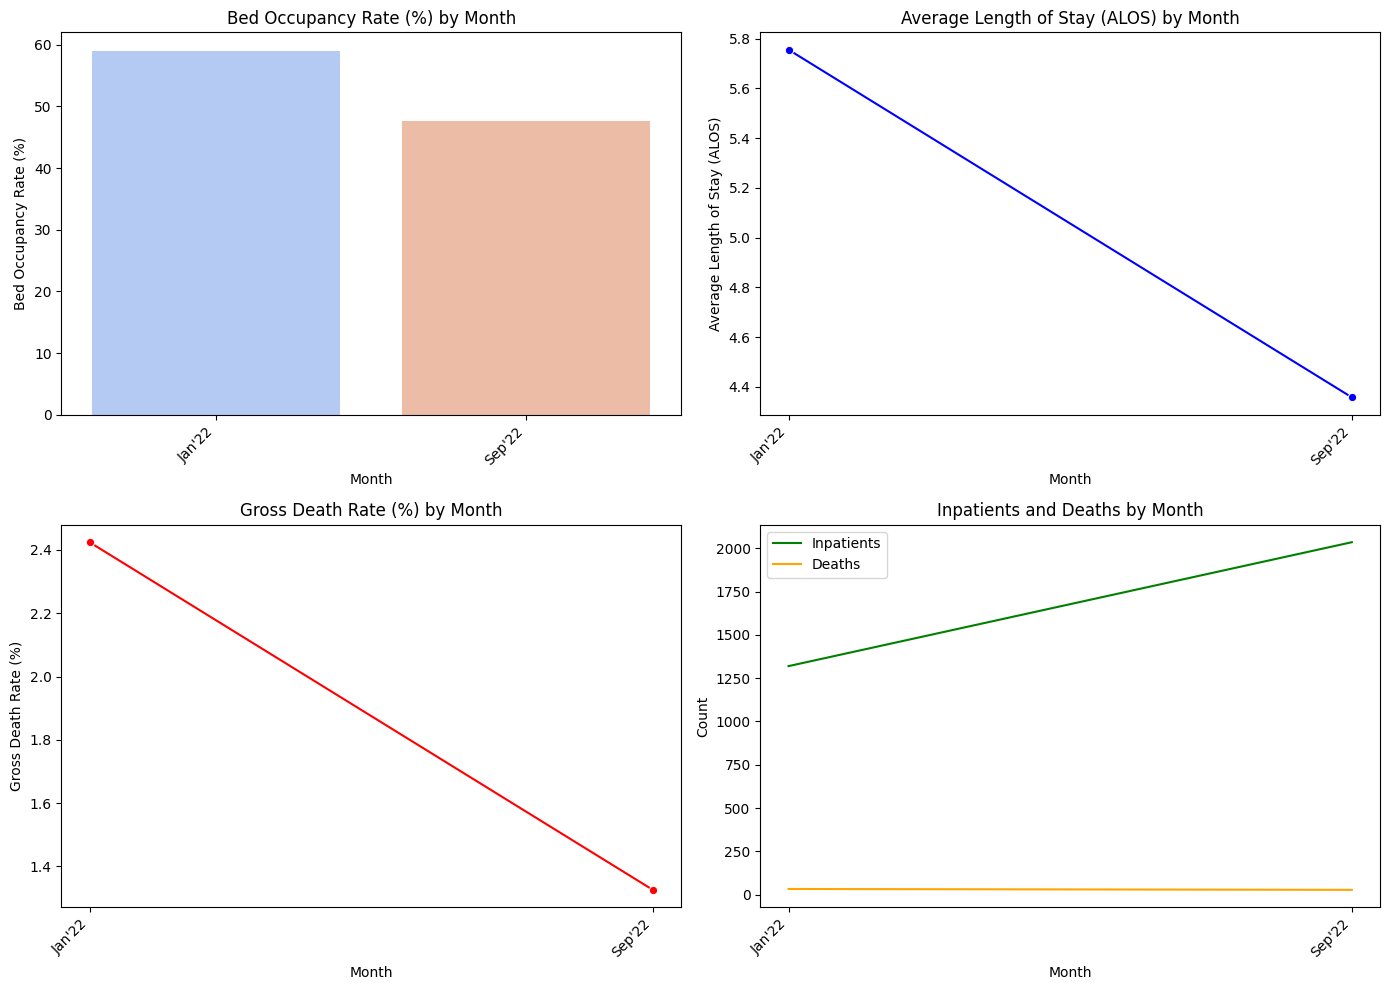


Interpretation of Data:
There is a strong positive correlation between Bed Occupancy Rate and Average Length of Stay.
A higher Average Length of Stay correlates with a higher Gross Death Rate, which may indicate longer stays for more critically ill patients.

Summary of Key Metrics:
Average Bed Occupancy Rate: 53.38%
Average Length of Stay (ALOS): 5.06 days
Average Gross Death Rate (GDR): 1.88%


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('/content/Hospital Data9.xlsx')

# Rename columns to match the dataset structure (adjust as necessary)
df.columns = ['Month', 'Beds_Available', 'No_of_Inpatients', 'Inpatient_Days', 'No_of_Deaths', 'Deaths_within_48hrs']

# Define the number of days in each month
days_in_month = {
    "Jan'22": 31, "Feb'22": 28, "Mar'22": 31, "Apr'22": 30,
    "May'22": 31, "Jun'22": 30, "Jul'22": 31, "Aug'22": 31,
    "Sep'22": 30, "Oct'22": 31, "Nov'22": 30, "Dec'22": 31
}

# Map the number of days to the dataset
df['Days_in_Month'] = df['Month'].map(days_in_month)

# Remove rows with missing data in critical columns
df = df.dropna(subset=['Beds_Available', 'Inpatient_Days'])

# Calculate the Bed Occupancy Rate (BOR)
df['Bed_Occupancy_Rate (%)'] = (df['Inpatient_Days'] / (df['Beds_Available'] * df['Days_in_Month'])) * 100

# Calculate Average Length of Stay (ALOS)
df['Average_Length_of_Stay (ALOS)'] = df['Inpatient_Days'] / df['No_of_Inpatients']

# Calculate Gross Death Rate (GDR)
df['Gross_Death_Rate (%)'] = (df['No_of_Deaths'] / df['No_of_Inpatients']) * 100

# Generate descriptive statistics
desc_stats = df[['Bed_Occupancy_Rate (%)', 'Average_Length_of_Stay (ALOS)', 'Gross_Death_Rate (%)']].describe()

# Display descriptive statistics for key metrics
print("Descriptive Statistics of Key Metrics:")
print(desc_stats)

# Correlation between metrics
correlation = df[['Bed_Occupancy_Rate (%)', 'Average_Length_of_Stay (ALOS)', 'Gross_Death_Rate (%)']].corr()
print("\nCorrelation Matrix:")
print(correlation)

# Visualization of the data
plt.figure(figsize=(14, 10))

# Plotting Bed Occupancy Rate
plt.subplot(2, 2, 1)
sns.barplot(x='Month', y='Bed_Occupancy_Rate (%)', data=df, palette='coolwarm')
plt.title('Bed Occupancy Rate (%) by Month')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Bed Occupancy Rate (%)')

# Plotting Average Length of Stay
plt.subplot(2, 2, 2)
sns.lineplot(x='Month', y='Average_Length_of_Stay (ALOS)', data=df, marker='o', color='b')
plt.title('Average Length of Stay (ALOS) by Month')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Length of Stay (ALOS)')

# Plotting Gross Death Rate
plt.subplot(2, 2, 3)
sns.lineplot(x='Month', y='Gross_Death_Rate (%)', data=df, marker='o', color='r')
plt.title('Gross Death Rate (%) by Month')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Gross Death Rate (%)')

# Plotting Inpatients vs Deaths (to see correlation)
plt.subplot(2, 2, 4)
sns.lineplot(x='Month', y='No_of_Inpatients', data=df, label='Inpatients', color='g')
sns.lineplot(x='Month', y='No_of_Deaths', data=df, label='Deaths', color='orange')
plt.title('Inpatients and Deaths by Month')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.legend()

# Adjust the layout
plt.tight_layout()
plt.show()

# Additional Insights Interpretation
print("\nInterpretation of Data:")
# Interpretation of the correlations
if correlation.iloc[0, 1] > 0.5:
    print("There is a strong positive correlation between Bed Occupancy Rate and Average Length of Stay.")
elif correlation.iloc[0, 1] < -0.5:
    print("There is a strong negative correlation between Bed Occupancy Rate and Average Length of Stay.")
else:
    print("There is a weak correlation between Bed Occupancy Rate and Average Length of Stay.")

# Interpretation based on GDR and ALOS
if correlation.iloc[1, 2] > 0.5:
    print("A higher Average Length of Stay correlates with a higher Gross Death Rate, which may indicate longer stays for more critically ill patients.")
else:
    print("There is little correlation between Average Length of Stay and Gross Death Rate.")

# Conclusions from the Descriptive Statistics
mean_bor = desc_stats.loc['mean', 'Bed_Occupancy_Rate (%)']
mean_alos = desc_stats.loc['mean', 'Average_Length_of_Stay (ALOS)']
mean_gdr = desc_stats.loc['mean', 'Gross_Death_Rate (%)']

print("\nSummary of Key Metrics:")
print(f"Average Bed Occupancy Rate: {mean_bor:.2f}%")
print(f"Average Length of Stay (ALOS): {mean_alos:.2f} days")
print(f"Average Gross Death Rate (GDR): {mean_gdr:.2f}%")

# Based on these averages, provide a high-level recommendation
if mean_bor > 85:
    print("The hospital appears to be operating at near full capacity most of the time.")
if mean_alos > 7:
    print("The average length of stay is relatively long. Consider reviewing discharge policies to optimize bed usage.")
if mean_gdr > 2:
    print("The Gross Death Rate is higher than expected, which warrants further investigation into patient care and treatment practices.")

In [40]:
# Ensure no critical data is missing for calculation
df = df.dropna(subset=['No_of_Deaths', 'No_of_Inpatients'])

# Calculate Gross Death Rate (GDR)
df['Gross_Death_Rate (%)'] = (df['No_of_Deaths'] / df['No_of_Inpatients']) * 100

# Extract the required columns
data = df[['Month', 'Gross_Death_Rate (%)']]

# Statistical Summary
average_gdr = data['Gross_Death_Rate (%)'].mean()
max_gdr = data['Gross_Death_Rate (%)'].max()
min_gdr = data['Gross_Death_Rate (%)'].min()
max_month = data.loc[data['Gross_Death_Rate (%)'].idxmax(), 'Month']
min_month = data.loc[data['Gross_Death_Rate (%)'].idxmin(), 'Month']

# Generate insights
print("=== Data Insights ===")
print(f"1. The average Gross Death Rate (GDR) is {average_gdr:.2f}%.")
print(f"2. The highest GDR is {max_gdr:.2f}% in {max_month}.")
print(f"3. The lowest GDR is {min_gdr:.2f}% in {min_month}.")
print(f"4. Variations in GDR across months suggest trends worth exploring (e.g., peak or low months).")

# Identify months with significant deviations (anomalies)
threshold = average_gdr * 1.5  # Define an anomaly threshold (e.g., 50% above average)
anomalies = data[data['Gross_Death_Rate (%)'] > threshold]

if not anomalies.empty:
    print("\n=== Anomalous Months ===")
    print(anomalies)
    print(f"The months listed above have GDRs significantly higher than average ({threshold:.2f}%).")
else:
    print("\nNo significant anomalies detected in GDR.")

# Recommendations (example)
print("\n=== Recommendations ===")
print("1. Investigate factors contributing to high GDR in peak months to identify potential causes (e.g., seasonal trends, resource shortages).")
print("2. Assess months with low GDR to replicate effective practices.")
print("3. Regularly monitor GDR to identify early warnings and implement corrective measures.")

=== Data Insights ===
1. The average Gross Death Rate (GDR) is 1.88%.
2. The highest GDR is 2.42% in Jan'22.
3. The lowest GDR is 1.33% in Sep'22.
4. Variations in GDR across months suggest trends worth exploring (e.g., peak or low months).

No significant anomalies detected in GDR.

=== Recommendations ===
1. Investigate factors contributing to high GDR in peak months to identify potential causes (e.g., seasonal trends, resource shortages).
2. Assess months with low GDR to replicate effective practices.
3. Regularly monitor GDR to identify early warnings and implement corrective measures.
